In [11]:
import kagglehub
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")
print("Path to dataset files:", path)

import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization data
import plotly.express as px # visualization data
import seaborn as sns # visualization data
import warnings

Path to dataset files: /kaggle/input/london-bike-sharing-dataset


1. Read CSV & Understanding Data

In [12]:
bike_sharing = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv')
bike_sharing.head()
bike_sharing.info()
bike_sharing.shape
bike_sharing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [13]:
bike_sharing.t1.unique()

array([ 3.        ,  2.5       ,  2.        ,  1.        ,  1.5       ,
        4.        ,  5.        ,  6.        ,  6.5       ,  7.        ,
        8.        ,  9.        , 10.        ,  9.5       ,  8.5       ,
       11.        ,  7.5       ,  5.5       ,  4.5       ,  3.5       ,
       11.5       , 12.        , 10.5       , 12.5       , 13.        ,
       13.5       , 15.        , 15.5       , 14.        ,  0.5       ,
        0.        , -0.5       , -1.        , -1.5       , 16.        ,
       14.5       , 16.5       , 17.5       , 17.        , 18.        ,
       19.5       , 20.5       , 20.        , 18.5       , 21.5       ,
       22.5       , 22.        , 23.5       , 23.        , 24.        ,
       25.        , 19.        , 21.        , 24.5       , 25.5       ,
       26.        , 27.        , 28.5       , 29.        , 30.        ,
       33.        , 32.        , 31.5       , 33.5       , 34.        ,
       29.5       , 27.5       , 26.5       , 28.        , 30.5 

In [14]:
bike_sharing.t2.unique()

array([ 2.        ,  2.5       ,  0.        , -1.        , -0.5       ,
       -1.5       ,  1.5       ,  1.        ,  3.        ,  3.5       ,
        4.        ,  4.5       ,  5.        ,  5.5       ,  6.5       ,
        6.        ,  7.5       ,  7.        ,  8.        ,  8.5       ,
        9.        , 11.        , 11.5       , 12.        ,  9.5       ,
       12.5       , 13.        , 13.5       , 15.        , 15.5       ,
       14.        ,  0.5       , -2.        , -3.        , -2.5       ,
       -3.5       , -4.        , -6.        , -5.5       , -4.5       ,
       16.        , 14.5       , 10.        , 16.5       , 17.5       ,
       17.        , 18.        , 19.5       , 20.5       , 20.        ,
       18.5       , 21.        , 21.5       , 22.5       , 22.        ,
       23.        , 24.        , 19.        , 10.5       , 24.5       ,
       25.        , 23.5       , 25.5       , 26.        , 27.        ,
       28.        , 27.5       , 30.        , 33.        , 32.  

In [15]:
bike_sharing.is_holiday.unique()

array([0., 1.])

In [16]:
bike_sharing.is_weekend.unique()

array([1., 0.])

In [17]:
bike_sharing.wind_speed.unique()

array([ 6.        ,  5.        ,  0.        ,  6.5       ,  4.        ,
        7.        ,  8.        ,  9.        , 12.        , 13.        ,
       15.        , 11.        ,  7.5       , 10.        , 14.        ,
       16.        , 19.5       , 18.        , 19.        , 27.5       ,
       26.        , 23.        , 22.        , 17.5       , 21.        ,
       27.        , 28.        , 28.5       , 25.        , 24.        ,
       30.        , 30.5       , 20.5       , 17.        , 22.5       ,
       29.5       , 29.        , 33.        , 32.5       , 31.5       ,
       33.5       , 37.        , 35.        , 36.        , 41.        ,
       44.        , 40.        , 41.5       , 39.        , 40.5       ,
       48.        , 42.5       , 38.        , 20.        , 34.        ,
       31.        , 18.5       , 24.5       , 21.5       , 44.5       ,
       45.        , 32.        , 23.5       ,  5.5       ,  3.5       ,
        4.5       ,  3.        ,  2.        , 16.5       ,  8.5 

In [18]:
bike_sharing.season.unique()

array([3., 0., 1., 2.])

In [19]:
bike_sharing.weather_code.unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [20]:
bike_sharing.weather_code.value_counts()

,count
weather_code,
1.0,6150
2.0,4034
3.0,3551
7.0,2141
4.0,1464
26.0,60
10.0,14


In [21]:
bike_sharing.isna().sum()

,0
timestamp,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


2. Data Preparation & Cleaning

In [22]:
# Rename Columns

new_cols_name = {
               'timestamp':'time',
               'cnt': 'count',
               't1':'temp_real',
               't2':'temp_feels_like',
               'hum':'humidity_percent',
               'wind_speed':'wind_speed_kph',
               'weather_code':'weather',
               'is_holiday':'is_holiday',
               'is_weekend':'is_weekend',
               'season':'season'}
bike_sharing.rename(new_cols_name, axis=1, inplace=True)

In [23]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              17414 non-null  object 
 1   count             17414 non-null  int64  
 2   temp_real         17414 non-null  float64
 3   temp_feels_like   17414 non-null  float64
 4   humidity_percent  17414 non-null  float64
 5   wind_speed_kph    17414 non-null  float64
 6   weather           17414 non-null  float64
 7   is_holiday        17414 non-null  float64
 8   is_weekend        17414 non-null  float64
 9   season            17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [24]:
bike_sharing['time'] = pd.to_datetime(bike_sharing['time'])

bike_sharing['Time'] = bike_sharing['time'].dt.time
bike_sharing['date'] = bike_sharing['time'].dt.date
bike_sharing['day'] = bike_sharing['time'].dt.day
bike_sharing['month'] = bike_sharing['time'].dt.month
bike_sharing['year'] = bike_sharing['time'].dt.year

print(bike_sharing[['Time', 'date', 'day', 'month', 'year']])

           Time        date  day  month  year
0      00:00:00  2015-01-04    4      1  2015
1      01:00:00  2015-01-04    4      1  2015
2      02:00:00  2015-01-04    4      1  2015
3      03:00:00  2015-01-04    4      1  2015
4      04:00:00  2015-01-04    4      1  2015
...         ...         ...  ...    ...   ...
17409  19:00:00  2017-01-03    3      1  2017
17410  20:00:00  2017-01-03    3      1  2017
17411  21:00:00  2017-01-03    3      1  2017
17412  22:00:00  2017-01-03    3      1  2017
17413  23:00:00  2017-01-03    3      1  2017

[17414 rows x 5 columns]


In [25]:
Reorder = [ 'time', 'Time', 'date', 'day', 'month', 'year', 'count', 'temp_real', 'temp_feels_like', 'humidity_percent', 'wind_speed_kph', 'weather', 'is_holiday', 'is_weekend', 'season']

bike_sharing = bike_sharing[Reorder]
print(bike_sharing.head())

                 time      Time        date  day  month  year  count  \
0 2015-01-04 00:00:00  00:00:00  2015-01-04    4      1  2015    182   
1 2015-01-04 01:00:00  01:00:00  2015-01-04    4      1  2015    138   
2 2015-01-04 02:00:00  02:00:00  2015-01-04    4      1  2015    134   
3 2015-01-04 03:00:00  03:00:00  2015-01-04    4      1  2015     72   
4 2015-01-04 04:00:00  04:00:00  2015-01-04    4      1  2015     47   

   temp_real  temp_feels_like  humidity_percent  wind_speed_kph  weather  \
0        3.0              2.0              93.0             6.0      3.0   
1        3.0              2.5              93.0             5.0      1.0   
2        2.5              2.5              96.5             0.0      1.0   
3        2.0              2.0             100.0             0.0      1.0   
4        2.0              0.0              93.0             6.5      1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2 

In [26]:
bike_sharing.drop(['time'],axis=1,inplace=True)
bike_sharing.head()

/tmp/ipython-input-26-3823683643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_sharing.drop(['time'],axis=1,inplace=True)


,Time,date,day,month,year,count,temp_real,temp_feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,00:00:00,2015-01-04,4,1,2015,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,01:00:00,2015-01-04,4,1,2015,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,02:00:00,2015-01-04,4,1,2015,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,03:00:00,2015-01-04,4,1,2015,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,04:00:00,2015-01-04,4,1,2015,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [27]:
bike_sharing.humidity_percent = bike_sharing.humidity_percent / 100

In [28]:
bike_sharing.head()

,Time,date,day,month,year,count,temp_real,temp_feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,00:00:00,2015-01-04,4,1,2015,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,01:00:00,2015-01-04,4,1,2015,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,02:00:00,2015-01-04,4,1,2015,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,03:00:00,2015-01-04,4,1,2015,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,04:00:00,2015-01-04,4,1,2015,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0


In [29]:
#creating a weather dictionary to map integers to the actual values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'

}

#creating a season dictionary to map integers to the actual values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}



In [30]:
# Changing data type to the string
bike_sharing.weather =  bike_sharing.weather.astype('str')
bike_sharing.season =  bike_sharing.season.astype('str')

In [31]:
# mapping the dictonary
bike_sharing.weather = bike_sharing.weather.map(weather_dict)
bike_sharing.season = bike_sharing.season.map(season_dict)

In [32]:
bike_sharing.head()

,Time,date,day,month,year,count,temp_real,temp_feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,00:00:00,2015-01-04,4,1,2015,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,01:00:00,2015-01-04,4,1,2015,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,02:00:00,2015-01-04,4,1,2015,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,03:00:00,2015-01-04,4,1,2015,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,04:00:00,2015-01-04,4,1,2015,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


3. Data Analysis

In [33]:
bike_sharing.describe().T

,count,mean,std,min,25%,50%,75%,max
day,17414.0,15.751981,8.793704,1.000,8.00,16.000,23.00,31.0
month,17414.0,6.514643,3.452509,1.000,4.00,7.000,10.00,12.0
year,17414.0,2015.507810,0.508157,2015.000,2015.00,2016.000,2016.00,2017.0
count,17414.0,1143.101642,1085.108068,0.000,257.00,844.000,1671.75,7860.0
temp_real,17414.0,12.468091,5.571818,-1.500,8.00,12.500,16.00,34.0
temp_feels_like,17414.0,11.520836,6.615145,-6.000,6.00,12.500,16.00,34.0
humidity_percent,17414.0,0.723250,0.143132,0.205,0.63,0.745,0.83,1.0
wind_speed_kph,17414.0,15.913063,7.894570,0.000,10.00,15.000,20.50,56.5
is_holiday,17414.0,0.022051,0.146854,0.000,0.00,0.000,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.000,0.00,0.000,1.00,1.0


/tmp/ipython-input-42-3179774723.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




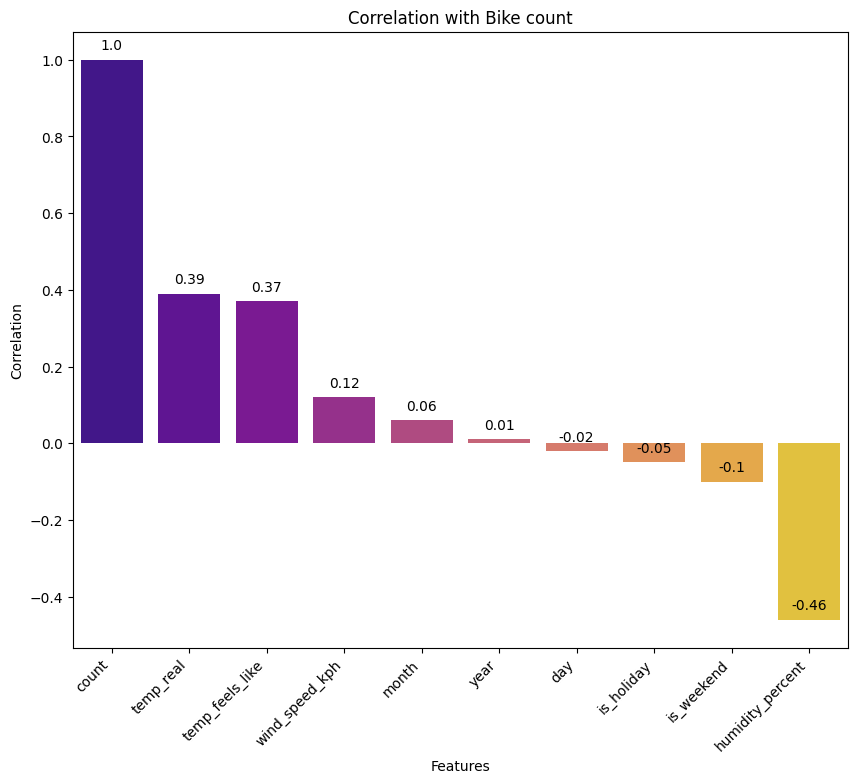

In [42]:
# Plotting the correlation of all variables

correlation_matrix = round(bike_sharing.select_dtypes("number").corr(),2)
correlation_with_count = correlation_matrix['count'].sort_values(ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x=correlation_with_count.index, y=correlation_with_count.values, palette='plasma')
plt.title('Correlation with Bike count')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

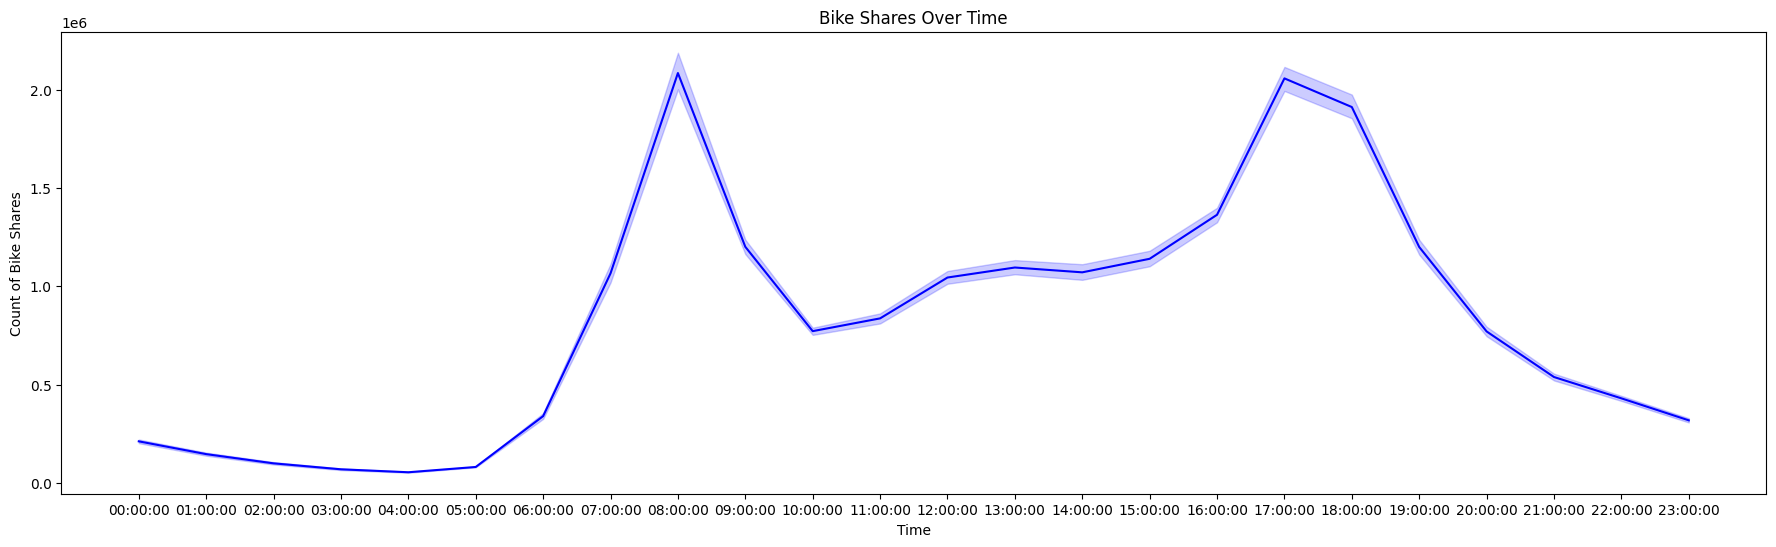

In [44]:
# Visualizing Bike Count over time

plt.figure(figsize=(22, 6))
sns.lineplot(x=bike_sharing.Time.astype(str), y='count', data=bike_sharing, color='BLUE', markers=True, estimator=sum)
plt.title('Bike Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Count of Bike Shares')
plt.tight_layout
plt.show()

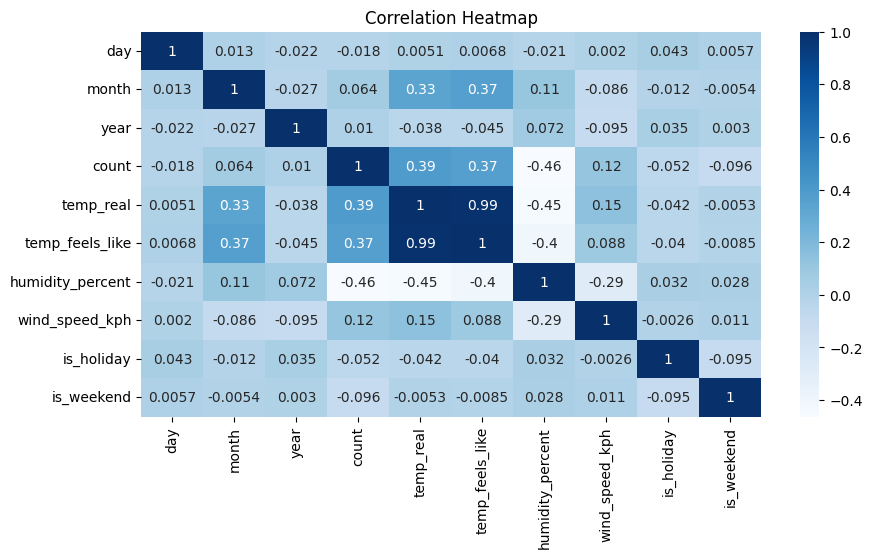

In [36]:
# Correlation Heatmap

bike_sharing_heatmap = bike_sharing.select_dtypes(include=[float,int])

plt.figure(figsize=(10,5))
sns.heatmap(bike_sharing_heatmap.corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap')
plt.show()

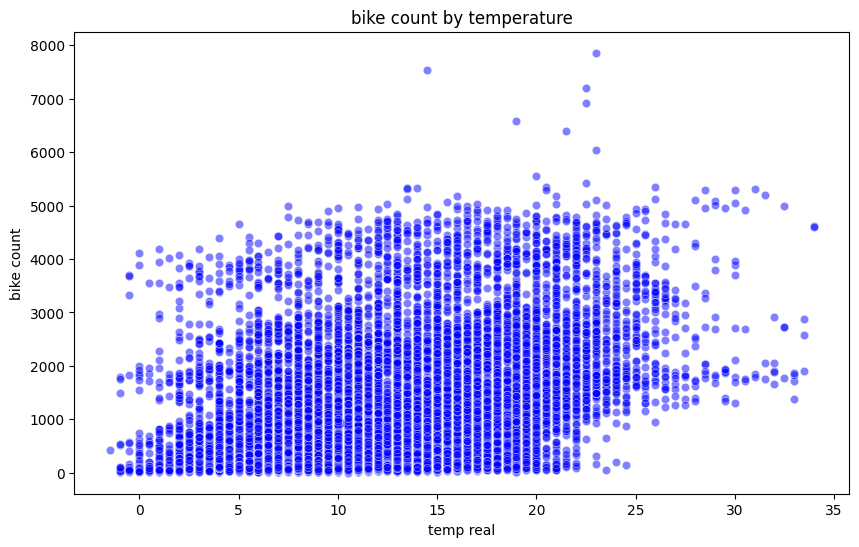

In [37]:
# Scatterplot of Bike Count and Temperature

plt.figure(figsize=(10,6))

sns.scatterplot(x='temp_real', y='count', data=bike_sharing, alpha=0.5, color='blue')
plt.title('bike count by temperature')
plt.xlabel('temp real')
plt.ylabel('bike count')

plt.show()

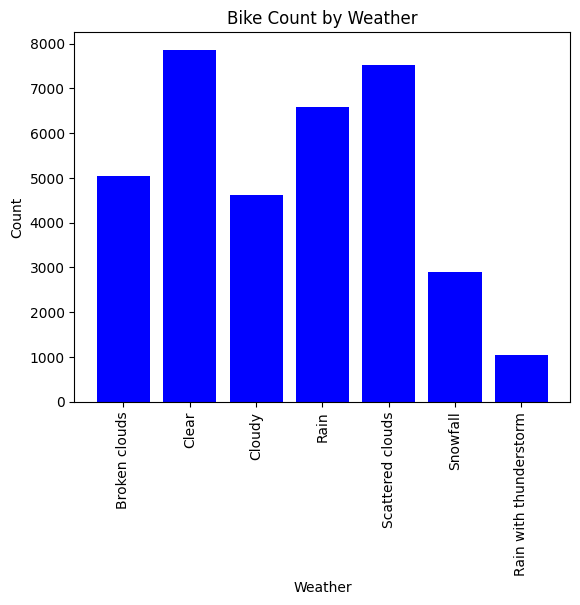

In [38]:
#Impact of Weather on the Bike Count

plt.bar(bike_sharing['weather'], bike_sharing['count'], color='blue')

plt.title('Bike Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

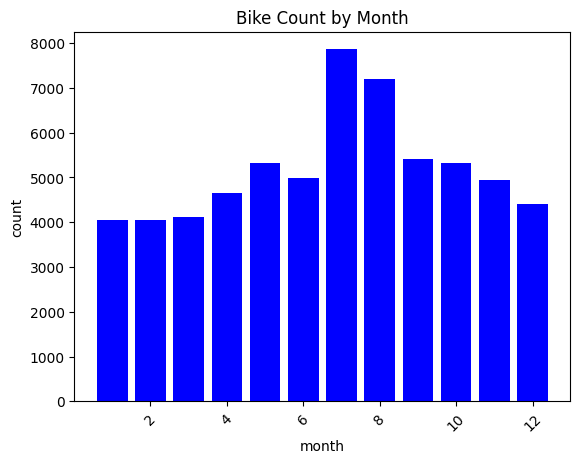

In [39]:
#Bike Count by Month

plt.bar(bike_sharing['month'], bike_sharing['count'], color='blue')
plt.title('Bike Count by Month')
plt.xlabel('month')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.show()

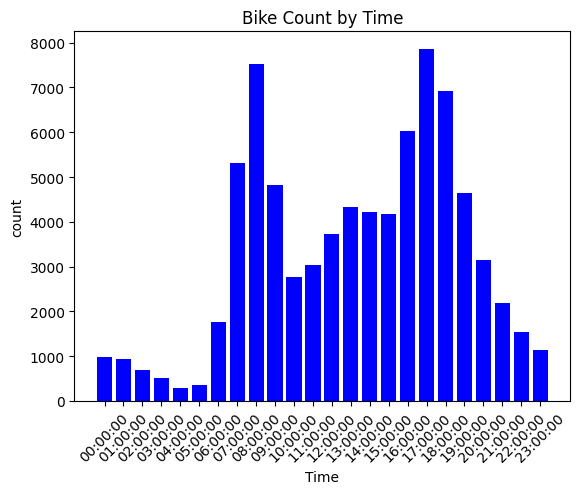

In [40]:
# Bike Count By Time

fig = plt.bar(bike_sharing['Time'].astype(str), bike_sharing['count'], color='blue')

plt.title('Bike Count by Time')
plt.xlabel('Time')
plt.ylabel('count')

plt.xticks(rotation=45)
plt.show()

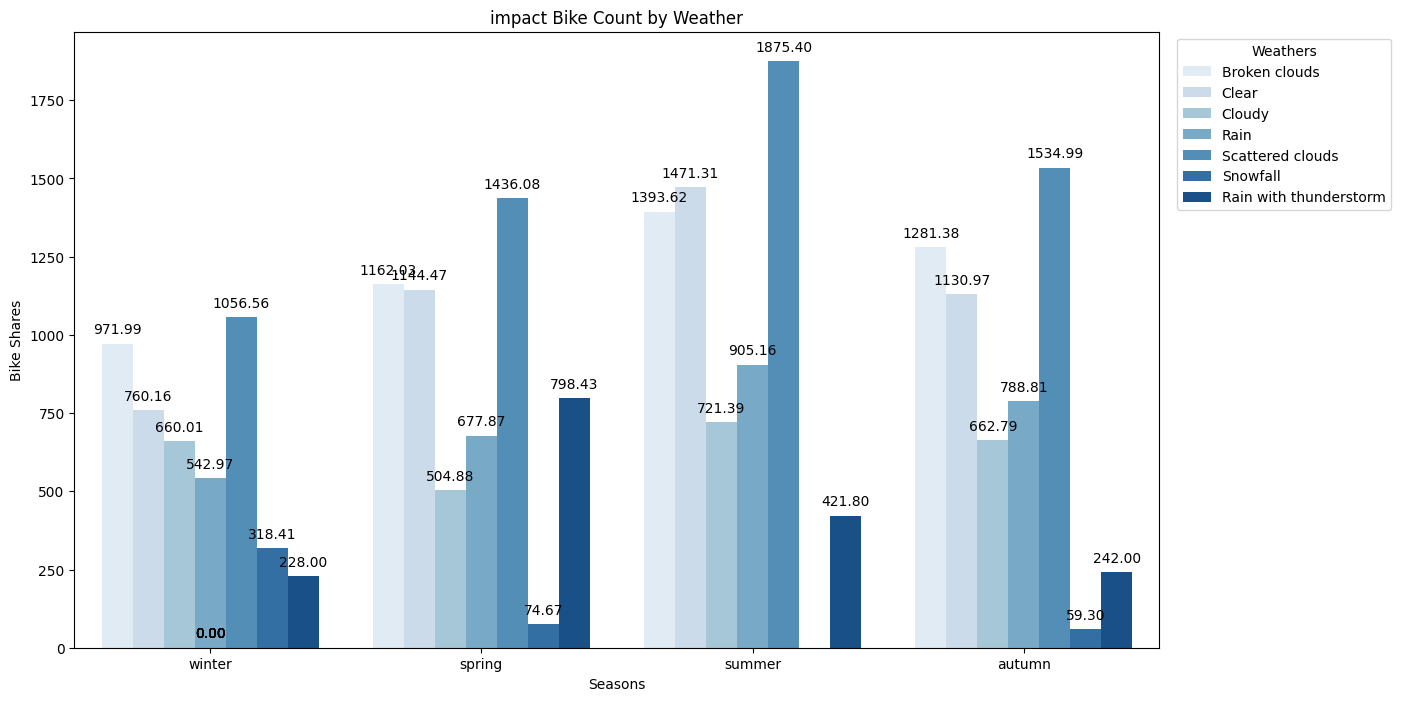

In [41]:
# Bike Count with Weather and Seasons Combined

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=bike_sharing['season'], data=bike_sharing, palette="Blues", y=bike_sharing['count'], hue=bike_sharing['weather'], errorbar=None)
plt.title('impact Bike Count by Weather')
plt.xlabel('Seasons')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(bbox_to_anchor = (0.72, 0.5, 0.5, 0.5), title= 'Weathers')
plt.show()